In [ ]:
import numpy as np
import torch

In [ ]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1
dtype = torch.float
device = torch.device("cpu")

In [ ]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

# добавить рандомные bias
b1 = torch.randn(hidden_size, device=device, dtype=dtype)
b2 = torch.randn(output_size, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h_1 = x.mm(w1) + b1
    h_relu = h_1.clamp(min=0)
    out = h_relu.mm(w2) + b2

    # Compute and print loss
    loss = (out - y).pow(2).sum().item()


    dloss_out = 2 * (out - y)
    grad_w2 = h_relu.t().mm(dloss_out)
    grad_b2 = dloss_out.sum(dim=0)

    grad_hrelu = dloss_out.mm(w2.t())
    grad_hrelu[h_1 < 0] = 0

    grad_w1 = x.t().mm(grad_hrelu)
    grad_b1 = grad_hrelu.sum(dim=0)


    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2

    if t % 100 == 99:
        print(f'Loss on iteration {t} = {loss}')




Loss on iteration 99 = 192.8910369873047
Loss on iteration 199 = 183.38851928710938
Loss on iteration 299 = 174.8063507080078
Loss on iteration 399 = 167.03375244140625
Loss on iteration 499 = 159.97630310058594


In [ ]:
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype, requires_grad=True)

b1 = torch.randn(hidden_size, device=device, dtype=dtype, requires_grad=True)
b2 = torch.randn(output_size, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(f'Loss on iteration {t} with AutoGrad =  {loss.item()}')


    loss.backward()


    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad


        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

Loss on iteration 99 with AutoGrad =  158.6230010986328
Loss on iteration 199 with AutoGrad =  154.67039489746094
Loss on iteration 299 with AutoGrad =  150.92242431640625
Loss on iteration 399 with AutoGrad =  147.3477325439453
Loss on iteration 499 with AutoGrad =  144.01171875


In [ ]:
# Create random input and output data
x = torch.randn(batch_size, input_size, dtype=torch.float32)
y = torch.randn(batch_size, output_size, dtype=torch.float32)

# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, dtype=torch.float32, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, dtype=torch.float32, requires_grad=True)

# добавить рандомные bias
b1 = torch.randn(hidden_size, dtype=torch.float32, requires_grad=True)
b2 = torch.randn(output_size, dtype=torch.float32, requires_grad=True)


learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h_1 = x.mm(w1) + b1
    h_relu = h_1.clamp(min=0)  # ReLU
    out = h_relu.mm(w2) + b2

    # Compute and print loss
    loss = (out - y).pow(2).sum()
    if t % 100 == 99:
        print(f'Loss on iteration {t} = {loss}\n')

    dloss_out = 2 * (out - y)
    grad_w2 = h_relu.t().mm(dloss_out)
    grad_b2 = dloss_out.sum(dim=0)

    grad_hrelu = dloss_out.mm(w2.t())
    grad_hrelu[h_1 < 0] = 0

    grad_w1 = x.t().mm(grad_hrelu)
    grad_b1 = grad_hrelu.sum(dim=0)

    # Backward pass:
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        if t % 100 == 99:
          print(f'Gradient for b1: {grad_b1}')
          print(f'AutoGrad gradient for b1: {b1.grad}')
          print(f'Gradient for b2: {grad_b2}')
          print(f'AutoGrad gradient for b2: {b2.grad}\n')

        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()



Loss on iteration 99 = 155.95086669921875

Gradient for b1: tensor([-15.2618,  59.2148], grad_fn=<SumBackward1>)
AutoGrad gradient for b1: tensor([-15.2618,  59.2148])
Gradient for b2: tensor([-29.9033], grad_fn=<SumBackward1>)
AutoGrad gradient for b2: tensor([-29.9033])

Loss on iteration 199 = 152.86834716796875

Gradient for b1: tensor([-14.4606,  56.6708], grad_fn=<SumBackward1>)
AutoGrad gradient for b1: tensor([-14.4606,  56.6708])
Gradient for b2: tensor([-27.8315], grad_fn=<SumBackward1>)
AutoGrad gradient for b2: tensor([-27.8315])

Loss on iteration 299 = 150.00982666015625

Gradient for b1: tensor([-13.6924,  54.2836], grad_fn=<SumBackward1>)
AutoGrad gradient for b1: tensor([-13.6924,  54.2836])
Gradient for b2: tensor([-25.8686], grad_fn=<SumBackward1>)
AutoGrad gradient for b2: tensor([-25.8686])

Loss on iteration 399 = 147.38526916503906

Gradient for b1: tensor([-12.9668,  49.2941], grad_fn=<SumBackward1>)
AutoGrad gradient for b1: tensor([-12.9668,  49.2941])
Gradien

Градиенты, посчитанные вручную, и градиенты, рассчитанные PyTorch AutoGrad, совпадают



Задание 2


Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка, и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

In [ ]:
df.head()

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 312.5 KB


Как и в любой задаче машинного обучения, для начала надо визуализировать данные. Не зря же нашу нейронную сеть мы так долго учим?

<Axes: xlabel='x1', ylabel='x2'>

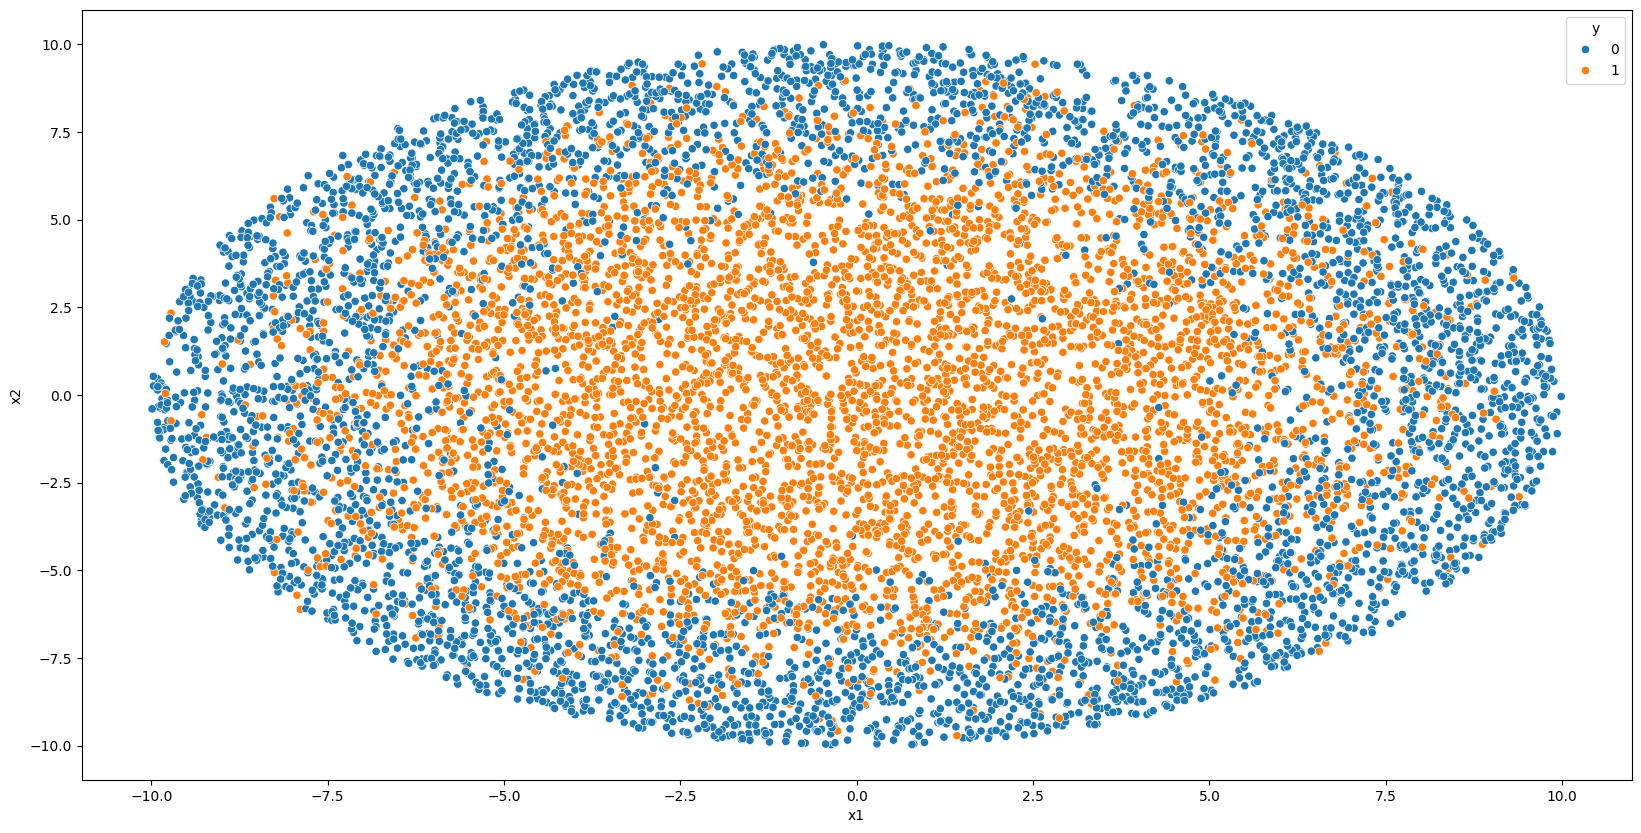

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:

1. Можем ли мы построить идеальную модель ? (условная метрика точность)
2. Что ещё мы хотим знать о выборке?
3. Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?


1. Мы видим что какой-то действительно четкой границы между классами нет, точки перемешаны между собой, поэтому построить идеальную моднль вряд ли выйдет
2. данные разделены нелинейно, то есть нельзя их разделить прямой линией; нужно также узнать сбалансированы ли классы и нет ли пропусков в данных
3. SVM с ядром RBF, которое должно хорошо подходить для нелинейных границ, деревья решений, Random Forest, Gradient Boosting

In [ ]:
y = df['y']

In [ ]:
y.value_counts() # данные неплохо сбалансированы

y
1    5097
0    4903
Name: count, dtype: int64

In [ ]:
df.isnull().sum() # пропусков нет

x1    0
x2    0
y     0
dtype: int64

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33, random_state = 42)

Точность нашей модели 0.5963636363636363


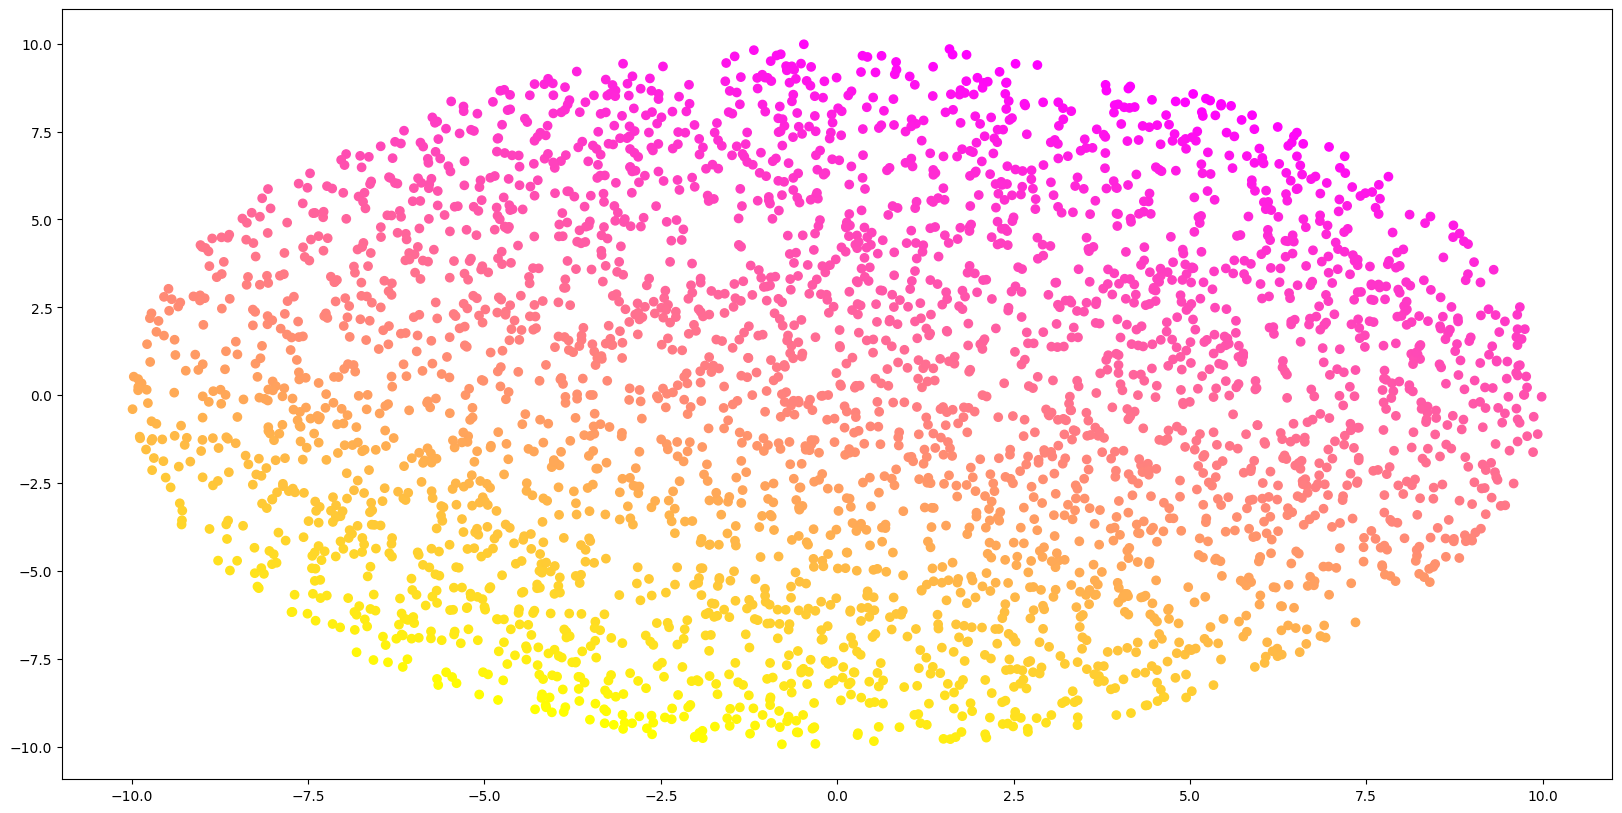

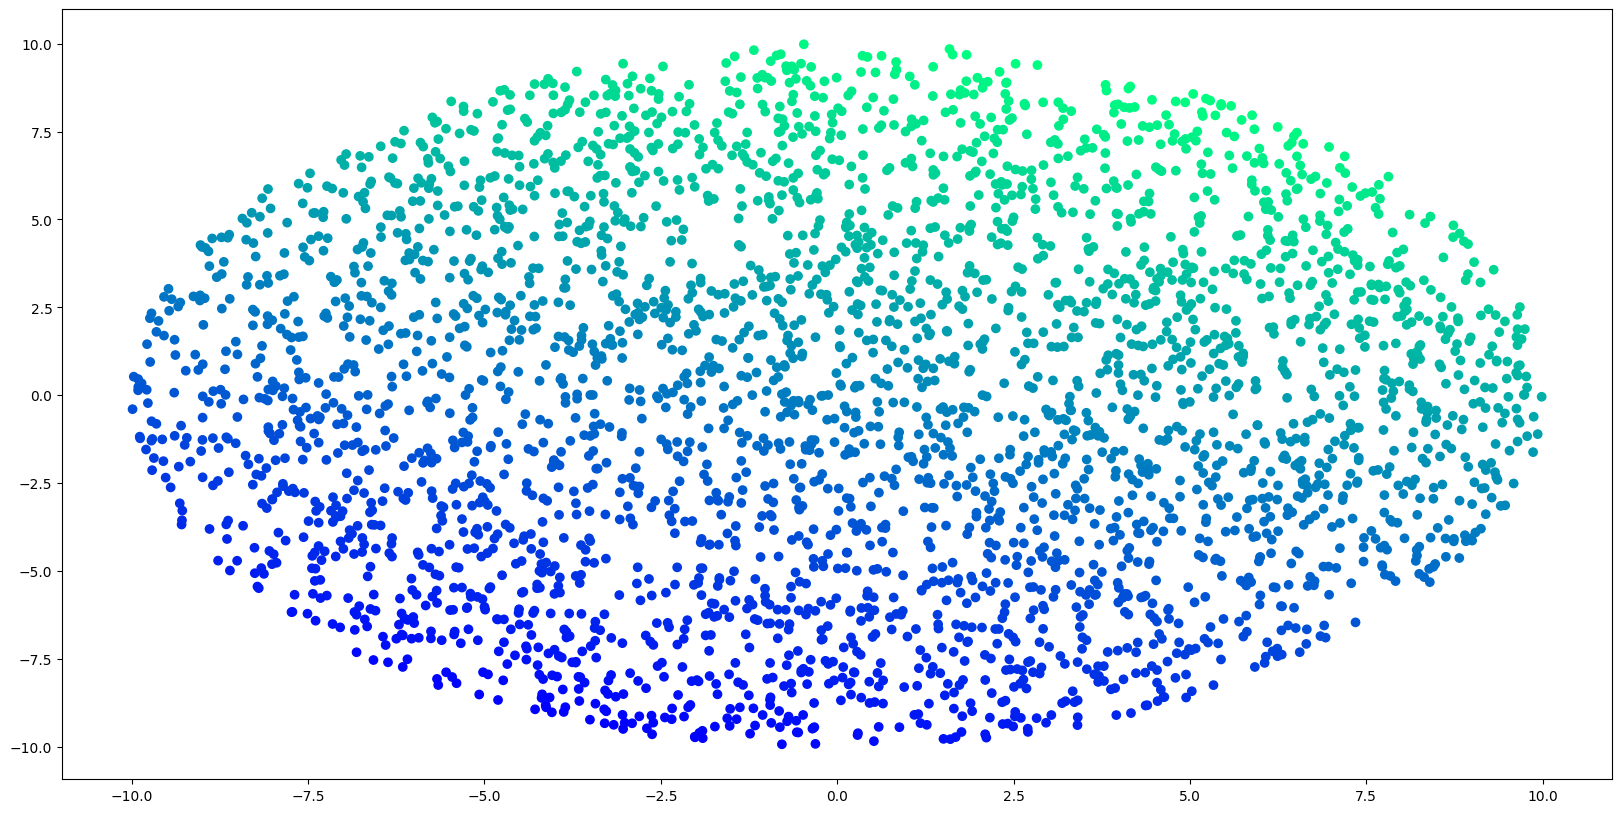

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

predict_logit =  model.predict(X_test)
predict_log_proba = model.predict_proba(X_test)


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba[:, 0], cmap='spring') # вероятность класса 0
plt.show()
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba[:, 1], cmap='winter') # вероятность класса 1
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение), а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8393939393939394


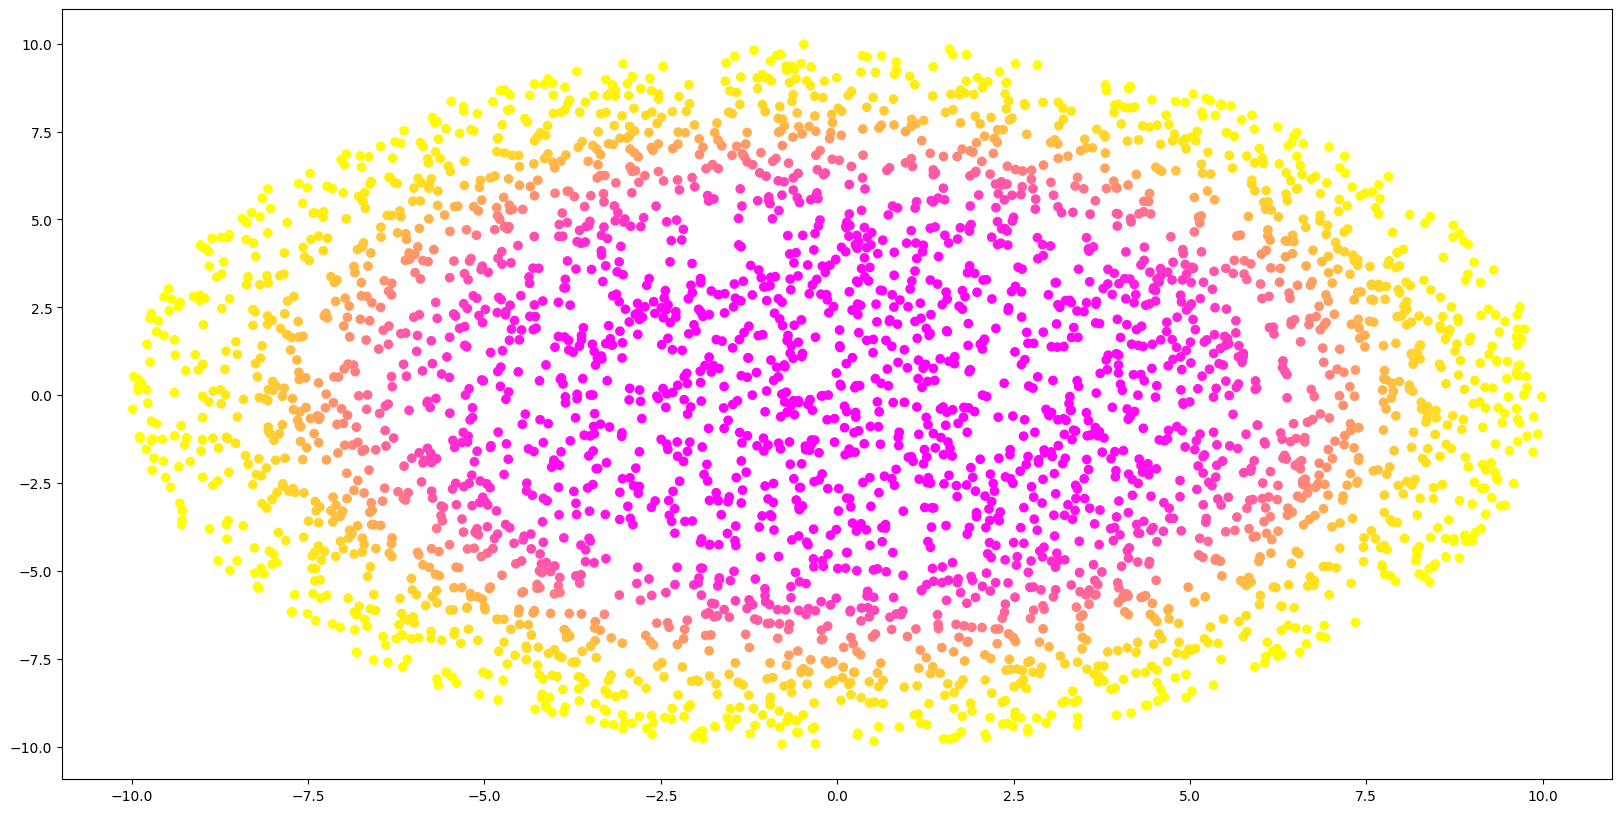

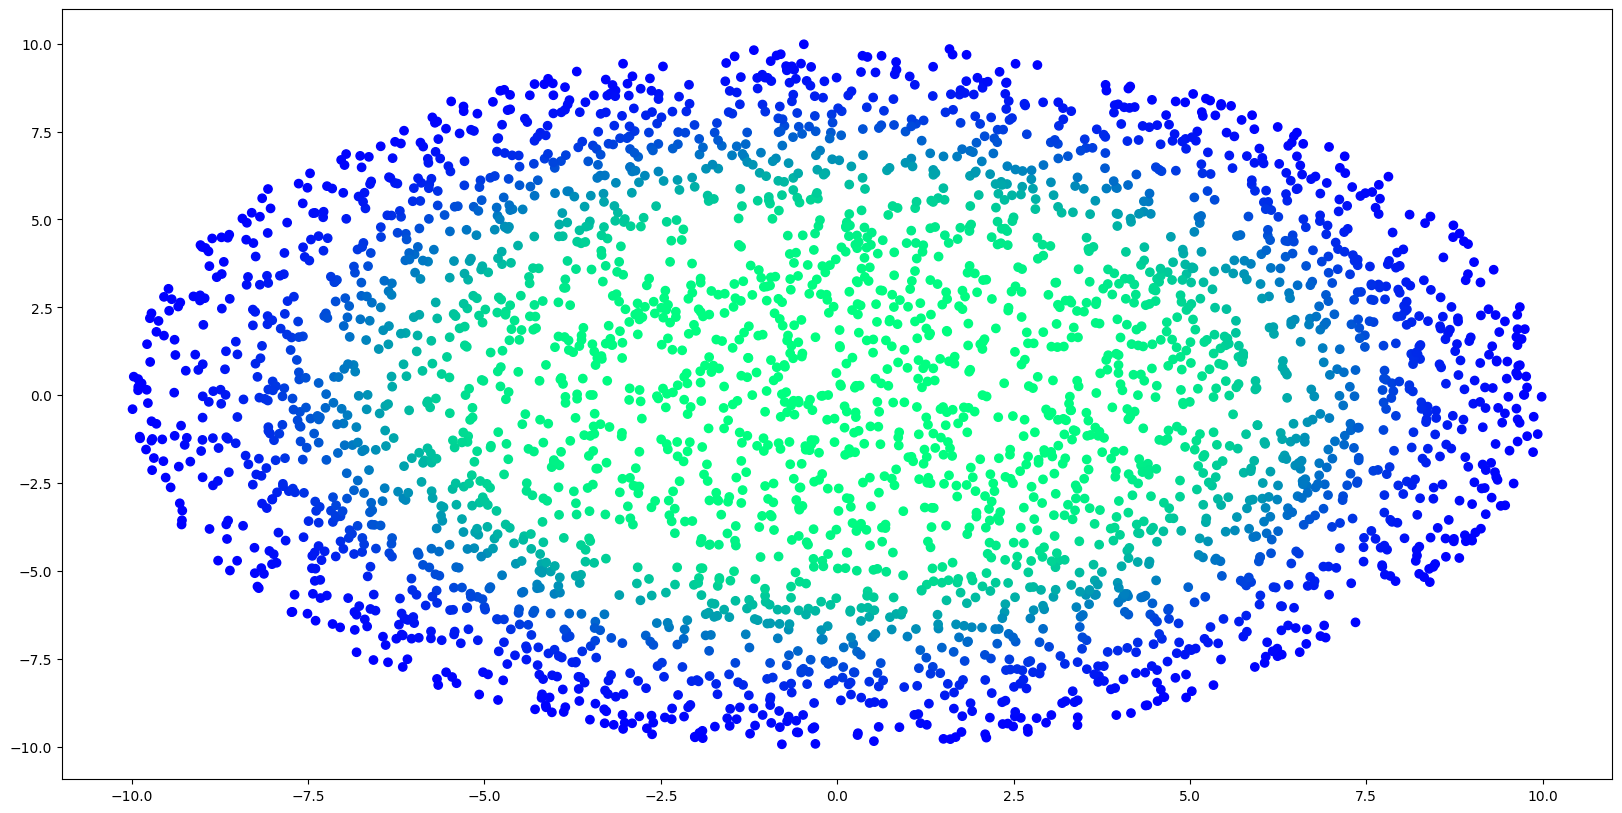

In [ ]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

df_new['new_feature_1'] = np.sqrt(df['x1'] ** 2 + df['x2'] ** 2) # можно попробовать добавить радиальное расстояние от центра, так как точки расролагаются можно сказать по кругу
df_new['new_feature_2'] = np.arctan2(df['x2'], df['x1']) # можно посчитать угол между точкой и осью, что может быть полезно из-за круговой структуры

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1', 'new_feature_2']],
                                                                    df_new['y'], test_size=0.33, random_state = 42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_new, y_train_new)

predict_logit = model.predict(X_test_new)
predict_log_proba = model.predict_proba(X_test_new)


print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba[:, 0], cmap='spring') # вероятность класса 0
plt.show()
plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba[:, 1], cmap='winter') # вероятность класса 1
plt.show()


Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Деревья могут довольно легко переобучаться, поэтому нужно установить максимальную глубину и зафиксировать random_state для воспроизводимости


Точность нашей модели 0.8103030303030303


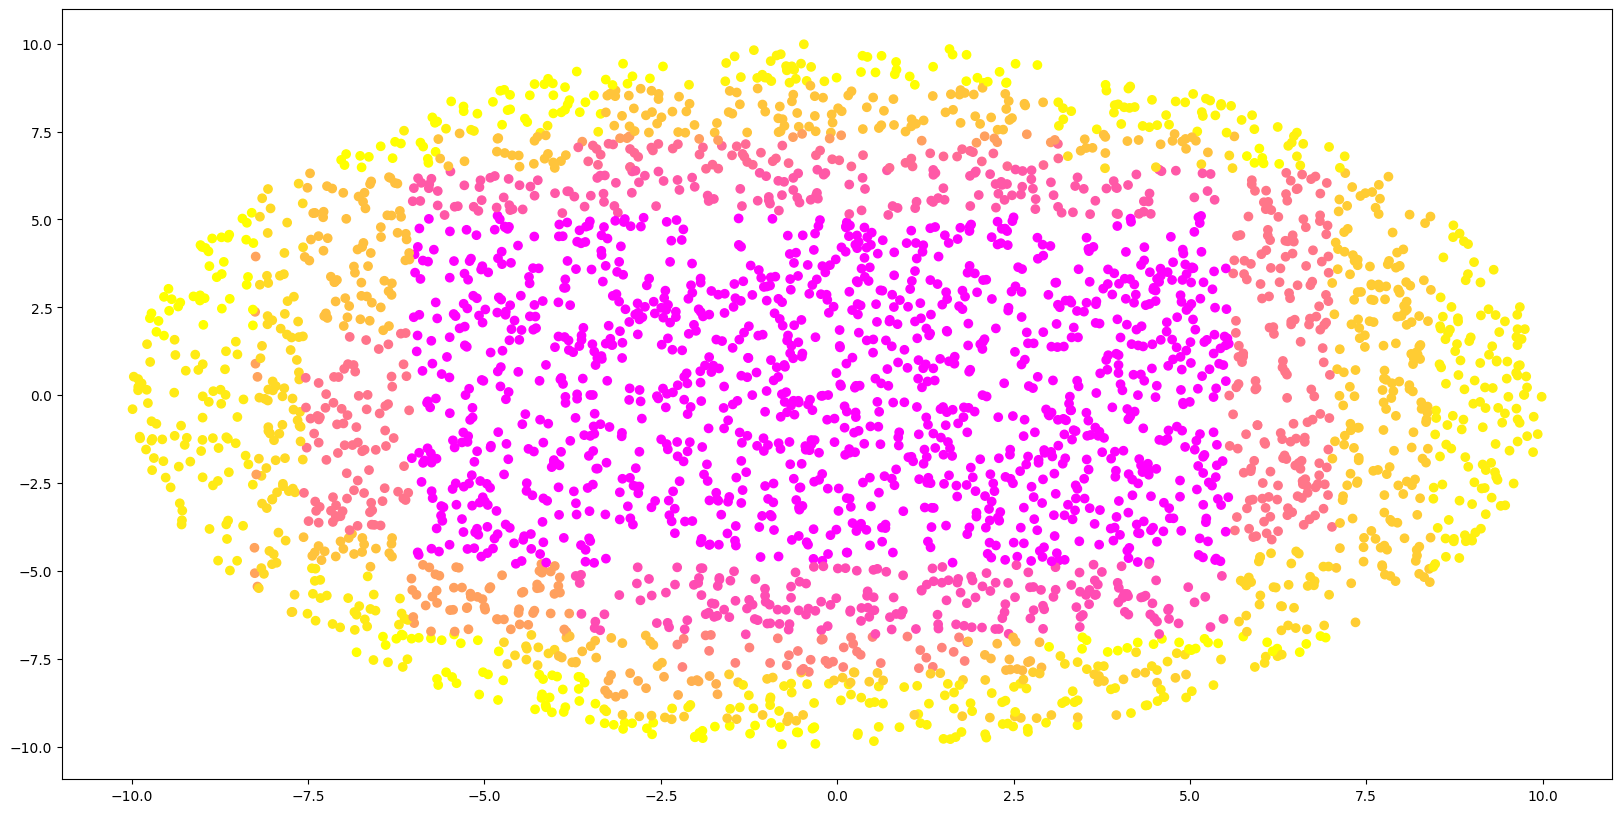

In [ ]:
from sklearn.tree import DecisionTreeClassifier

min_samples_leaf_array = range(1, 20)

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)


plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_tree_proba[:, 0], cmap='spring')

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ансамблирование может помочь, может повычить точность в случае дерева решений, которое склонно к переобучению. Random Forest, который будет использоваться, объединяет результатв деревьев решений, чтобы получить более точный результат; менее склонен к переобучению, более устойчив к шуму, менее чувствителен к смещениям. Но результат не то чтобы сильно улучшился

Точность нашей модели 0.8296969696969697


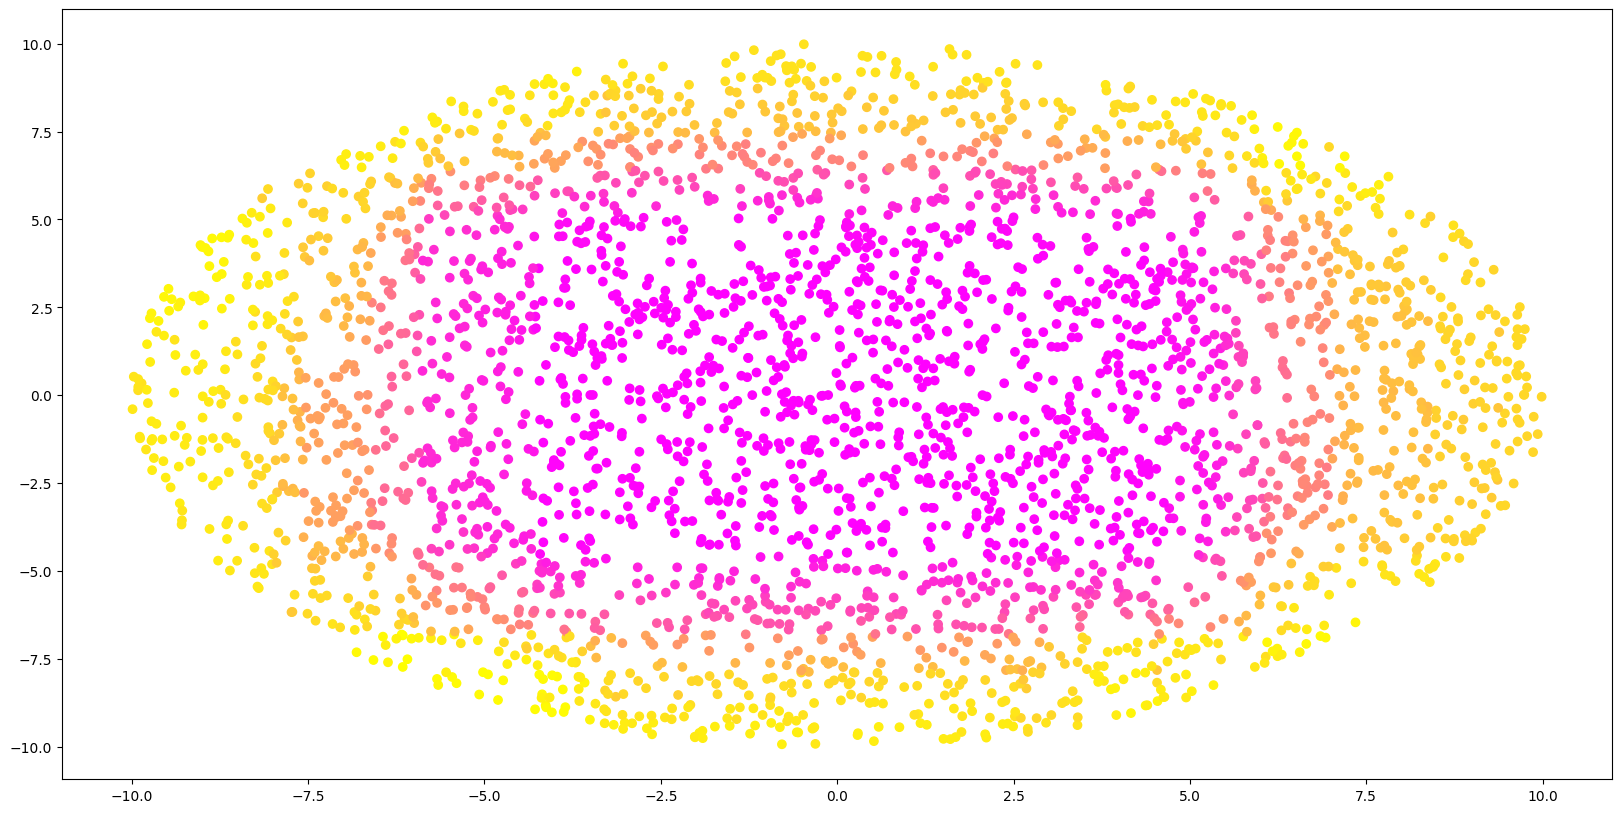

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)


predict_forest = rf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rf.predict_proba(X_test)


plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_forest_proba[:, 0], cmap='spring')
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом.

In [4]:
! pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 41.1 MB/s eta 0:00:00


In [5]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [49]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.to_numpy().astype(np.float32)),
                                            torch.tensor(y_train.to_numpy().astype(np.float32)))
    train_loader = data_utils.DataLoader(dataset=train_tensor, batch_size=64, shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.to_numpy().astype(np.float32)),
                                           torch.tensor(y_test.to_numpy().astype(np.float32)))
    test_loader = data_utils.DataLoader(dataset=test_tensor, batch_size=64, shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train, y_train, X_test, y_test)

In [42]:
input_size = 2
hidden_size = 5
output_size = 1
learning_rate = 0.001
epochs = 100

In [43]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [44]:
model = Model()

In [45]:
criterion = nn.BCELoss()  # так как всего два класса, это бинарная классификация. BCEWithLogitsLoss, который сочетает Binary Cross-Entropy и сигмоиду хуже работает тут
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [46]:
# обучение
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        labels = labels.unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels) # функция потерь

        optimizer.zero_grad() # обнуление градиентов
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 0.7388
Epoch 2/100, Loss: 0.7245
Epoch 3/100, Loss: 0.6713
Epoch 4/100, Loss: 0.6613
Epoch 5/100, Loss: 0.6291
Epoch 6/100, Loss: 0.6493
Epoch 7/100, Loss: 0.6340
Epoch 8/100, Loss: 0.5587
Epoch 9/100, Loss: 0.6047
Epoch 10/100, Loss: 0.6266
Epoch 11/100, Loss: 0.5741
Epoch 12/100, Loss: 0.5640
Epoch 13/100, Loss: 0.6066
Epoch 14/100, Loss: 0.5196
Epoch 15/100, Loss: 0.4840
Epoch 16/100, Loss: 0.4988
Epoch 17/100, Loss: 0.4241
Epoch 18/100, Loss: 0.4271
Epoch 19/100, Loss: 0.4221
Epoch 20/100, Loss: 0.4811
Epoch 21/100, Loss: 0.4324
Epoch 22/100, Loss: 0.4616
Epoch 23/100, Loss: 0.4444
Epoch 24/100, Loss: 0.4636
Epoch 25/100, Loss: 0.3478
Epoch 26/100, Loss: 0.2750
Epoch 27/100, Loss: 0.4281
Epoch 28/100, Loss: 0.4106
Epoch 29/100, Loss: 0.2751
Epoch 30/100, Loss: 0.3917
Epoch 31/100, Loss: 0.3885
Epoch 32/100, Loss: 0.3875
Epoch 33/100, Loss: 0.3597
Epoch 34/100, Loss: 0.4178
Epoch 35/100, Loss: 0.3592
Epoch 36/100, Loss: 0.2695
Epoch 37/100, Loss: 0.4514
Epoch 38/1

In [47]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))
    predicted_classes = (test_scores >= 0.5).float()  # верятности преобразуются в классы
    true_classes = torch.tensor(y_test.to_numpy().astype(np.float32)).unsqueeze(1)
    accuracy = (predicted_classes == true_classes).float().mean().item()  # точность

print(f'Accuracy: {accuracy}')

Accuracy: 0.8366666436195374


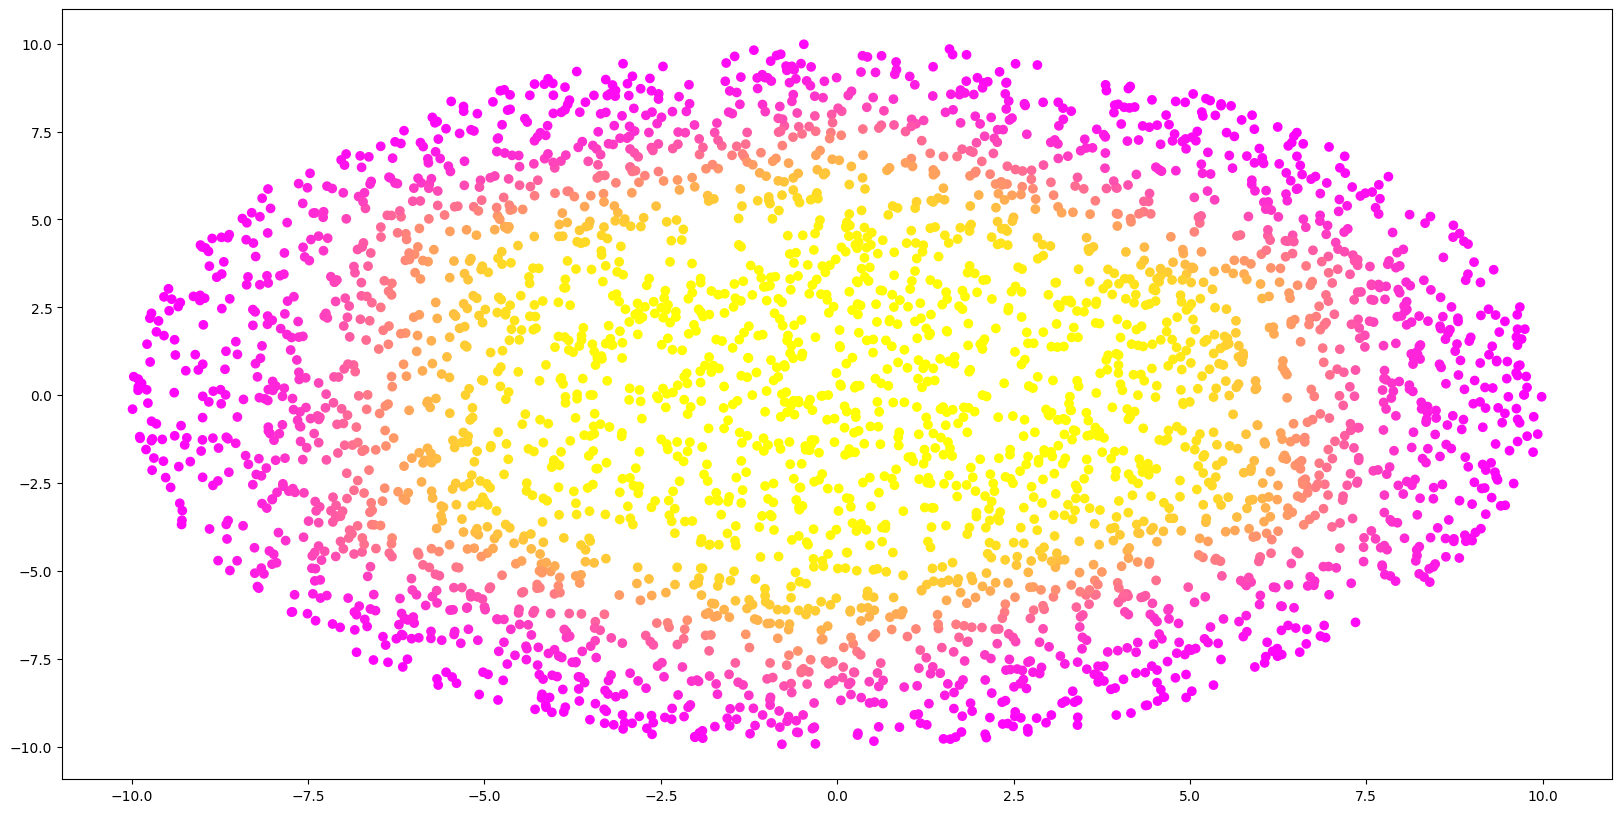

In [50]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores, cmap='spring')
plt.show()

Результат вышел не идеальным, хоть и неплохим, но не ощутимо лучше, чем с использованием других моделей
